In [18]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = "results.csv"     
PEAK_BW_GBS   = 160.0              
PEAK_PEAK_TF  = 1.0             

df = pd.read_csv(CSV_PATH)
df

,Optimization,Variant,Nrow,Mcol,elapsed_s,FLOPs,TFLOP/s,GB/s,AI
0,NaN,Separate Storage,10,10,0.000000e+00,200,inf,inf,0.208333
1,NaN,Separate Storage,100,100,1.502000e-05,20000,0.001332,5.432622,0.245098
2,NaN,Separate Storage,1000,1000,1.454350e-03,2000000,0.001375,5.511728,0.249501
3,NaN,Separate Storage,10000,10000,1.411723e-01,200000000,0.001417,5.667966,0.249950
4,NaN,Separate Storage with GCC Pragma Unroll,10,10,0.000000e+00,200,inf,inf,0.208333
5,NaN,Separate Storage with GCC Pragma Unroll,100,100,1.200000e-05,20000,0.001667,6.799772,0.245098
6,NaN,Separate Storage with GCC Pragma Unroll,1000,1000,1.146950e-03,2000000,0.001744,6.988957,0.249501
7,NaN,Separate Storage with GCC Pragma Unroll,10000,10000,1.373867e-01,200000000,0.001456,5.824144,0.249950
8,NaN,Contiguous Storage,10,10,3.200000e-07,200,0.000629,3.019899,0.208333
9,NaN,Contiguous Storage,100,100,1.129000e-05,20000,0.001772,7.230744,0.245098


In [24]:
# order df by Nrows descending and then by time ascending
df = df.sort_values(by=["Nrow", "elapsed_s"], ascending=[True, True])
df.to_csv("results_sorted.csv", index=False)

In [19]:
df = df.sort_values(by="GB/s", ascending=False)
# select the case nrow is 10000
df[df["Nrow"] == 10000]

,Optimization,Variant,Nrow,Mcol,elapsed_s,FLOPs,TFLOP/s,GB/s,AI
35,O2,Contiguous Storage with Manual Unroll,10000,10000,0.071300,200000000,0.002805,11.222386,0.24995
55,O3,Contiguous Storage with Manual Unroll,10000,10000,0.071455,200000000,0.002799,11.198146,0.24995
27,O2,Separate Storage with GCC Pragma Unroll,10000,10000,0.071818,200000000,0.002785,11.141504,0.24995
47,O3,Separate Storage with GCC Pragma Unroll,10000,10000,0.072276,200000000,0.002767,11.070853,0.24995
39,O2,Contiguous Storage with GCC Pragma Unroll,10000,10000,0.077551,200000000,0.002579,10.317817,0.24995
59,O3,Contiguous Storage with GCC Pragma Unroll,10000,10000,0.077551,200000000,0.002579,10.317817,0.24995
51,O3,Contiguous Storage,10000,10000,0.078089,200000000,0.002561,10.246812,0.24995
23,O2,Separate Storage,10000,10000,0.078435,200000000,0.002550,10.201524,0.24995
43,O3,Separate Storage,10000,10000,0.080739,200000000,0.002477,9.910498,0.24995
31,O2,Contiguous Storage,10000,10000,0.081359,200000000,0.002458,9.834930,0.24995


In [20]:
df[df["Nrow"] == 100]

,Optimization,Variant,Nrow,Mcol,elapsed_s,FLOPs,TFLOP/s,GB/s,AI
25,O2,Separate Storage with GCC Pragma Unroll,100,100,0.000003,20000,0.007626,31.114110,0.245098
33,O2,Contiguous Storage with Manual Unroll,100,100,0.000004,20000,0.005033,20.535312,0.245098
45,O3,Separate Storage with GCC Pragma Unroll,100,100,0.000004,20000,0.004660,19.014178,0.245098
41,O3,Separate Storage,100,100,0.000004,20000,0.004576,18.668466,0.245098
21,O2,Separate Storage,100,100,0.000005,20000,0.003995,16.297867,0.245098
29,O2,Contiguous Storage,100,100,0.000006,20000,0.003544,14.461488,0.245098
49,O3,Contiguous Storage,100,100,0.000006,20000,0.003495,14.260634,0.245098
57,O3,Contiguous Storage with GCC Pragma Unroll,100,100,0.000008,20000,0.002594,10.585213,0.245098
37,O2,Contiguous Storage with GCC Pragma Unroll,100,100,0.000009,20000,0.002133,8.701404,0.245098
53,O3,Contiguous Storage with Manual Unroll,100,100,0.000011,20000,0.001824,7.440331,0.245098


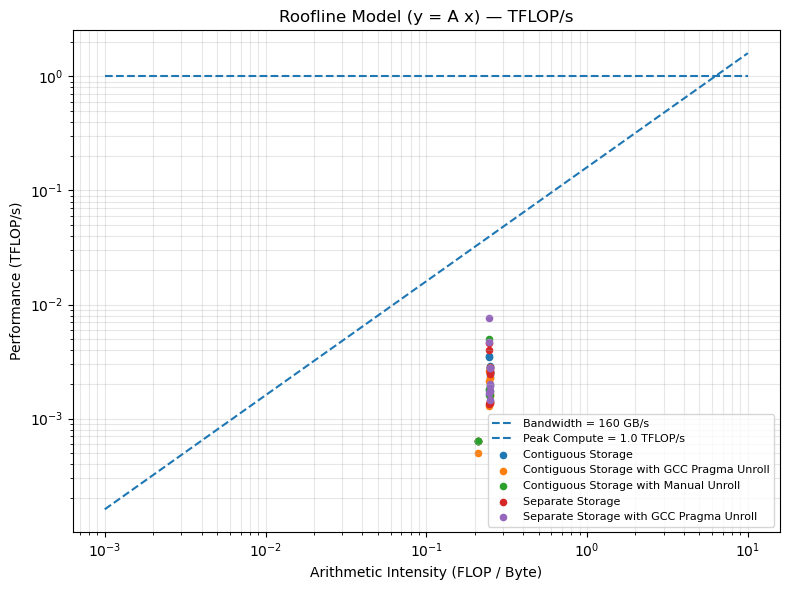

In [5]:

df["AI"] = df["AI"].astype(float)
tf_from_col = pd.to_numeric(df["TFLOP/s"], errors="coerce")
tf_from_calc = (df["FLOPs"] / df["elapsed_s"]) / 1e12
df["TFLOP/s_used"] = np.where(np.isfinite(tf_from_col), tf_from_col, tf_from_calc)
I_min = 1e-3
I_max = max(10.0, df["AI"].max() * 4)
I = np.logspace(math.log10(I_min), math.log10(I_max), 512)

# Bandwidth line: (GB/s * FLOP/Byte) -> GFLOP/s; convert to TFLOP/s by /1000
bw_line_tflops = (PEAK_BW_GBS * I) / 1000.0
compute_roof_tflops = PEAK_PEAK_TF
roof_tflops = np.minimum(bw_line_tflops, compute_roof_tflops)

# plot
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xscale("log")
ax.set_yscale("log")

# Roofs
ax.plot(I, bw_line_tflops, linestyle="--", label=f"Bandwidth = {PEAK_BW_GBS:.0f} GB/s")
ax.hlines(compute_roof_tflops, I[0], I[-1], linestyles="--",
          label=f"Peak Compute = {PEAK_PEAK_TF:.1f} TFLOP/s")
for variant, g in df.groupby("Variant"):
    ax.scatter(g["AI"], g["TFLOP/s_used"], marker="o", label=variant, s=20)

ax.set_xlabel("Arithmetic Intensity (FLOP / Byte)")
ax.set_ylabel("Performance (TFLOP/s)")
ax.set_title("Roofline Model (y = A x) — TFLOP/s")
ax.grid(True, which="both", alpha=0.3)
ax.legend(loc="lower right", fontsize=8)
fig.tight_layout()
plt.show()